In [1]:
using BeamLib: IsotropicArray, steerphi, bartlett
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# Bartlett spectrum 
# Same as steering dsb_weights
# but using the bartlett function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = bartlett.(Ref(pa), Ref(Rxx), Ref(fc), deg2rad.(ϕaxis))

360-element Vector{ComplexF64}:
  8.44799312194818 - 1.0433328327804844e-16im
 8.447769623435182 - 1.6254562257810024e-18im
 8.447097261537044 - 9.698611949356464e-17im
 8.445970439916172 + 5.657248351416747e-17im
 8.444379840497357 - 1.1798681911307733e-16im
 8.442312437272575 + 1.0070374709906377e-17im
 8.439751515774581 + 4.0373825430876226e-17im
 8.436676698364966 + 3.267344890738738e-17im
 8.433063975522316 + 1.3656881615170535e-16im
  8.42888574335483 + 1.292707802781623e-16im
                   ⋮
 8.454088842112489 + 2.4797736563816897e-17im
  8.45083696736614 + 1.1604351377383915e-18im
 8.447961012123642 + 6.633877339600955e-17im
 8.445485725943097 + 6.547479978981016e-17im
 8.443432023038575 + 7.407303123738856e-18im
 8.441816995720588 - 1.2143318441721826e-16im
 8.440653925774258 - 9.667271730308055e-17im
  8.43995229354611 + 8.59772322781005e-17im
 8.439717784561555 - 1.707626891994142e-16im

In [2]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(abs.(P)).indices]

2-element Vector{Float64}:
 10.779944289693589
 76.46239554317549

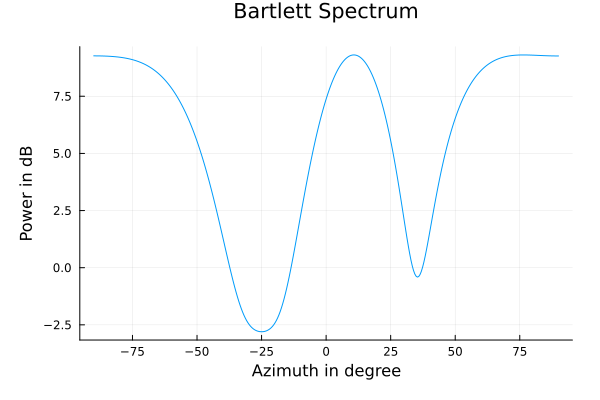

In [3]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(abs.(P)))
plot!(title="Bartlett Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")